In [1]:
!rm -rf /content/Split_data

In [2]:
!unzip -q '/content/drive/MyDrive/custom model/Split_data.zip' -d /content/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [4]:
training_data_path =  '/content/Split_data/Train/Group_3'
validation_data_path = '/content/Split_data/Validation/Group_3'

In [5]:
os.listdir(training_data_path)

['Taquito', 'Taco', 'apple_pie']

In [6]:
os.listdir(validation_data_path)

['Taquito', 'Taco', 'apple_pie']

In [7]:
os.listdir(training_data_path+'/Taquito')

['Taquito-Train (903).jpeg',
 'Taquito-Train (717).jpeg',
 'Taquito-Train (50).jpeg',
 'Taquito-Train (174).jpeg',
 'Taquito-Train (557).jpeg',
 'Taquito-Train (1365).jpeg',
 'Taquito-Train (523).jpeg',
 'Taquito-Train (954).jpeg',
 'Taquito-Train (1429).jpeg',
 'Taquito-Train (748).jpeg',
 'Taquito-Train (1100).jpeg',
 'Taquito-Train (1188).jpeg',
 'Taquito-Train (535).jpeg',
 'Taquito-Train (407).jpeg',
 'Taquito-Train (1205).jpeg',
 'Taquito-Train (928).jpeg',
 'Taquito-Train (465).jpeg',
 'Taquito-Train (1322).jpeg',
 'Taquito-Train (1107).jpeg',
 'Taquito-Train (1332).jpeg',
 'Taquito-Train (10).jpeg',
 'Taquito-Train (824).jpeg',
 'Taquito-Train (1095).jpeg',
 'Taquito-Train (432).jpeg',
 'Taquito-Train (474).jpeg',
 'Taquito-Train (297).jpeg',
 'Taquito-Train (1162).jpeg',
 'Taquito-Train (977).jpeg',
 'Taquito-Train (129).jpeg',
 'Taquito-Train (1024).jpeg',
 'Taquito-Train (356).jpeg',
 'Taquito-Train (261).jpeg',
 'Taquito-Train (1370).jpeg',
 'Taquito-Train (430).jpeg',
 'Ta

In [8]:
os.listdir(training_data_path+'/apple_pie')

['3175105.jpg',
 '1327259.jpg',
 '2126901.jpg',
 '2683315.jpg',
 '3358059.jpg',
 '2306493.jpg',
 '1579774.jpg',
 '2369640.jpg',
 '3723836.jpg',
 '421036.jpg',
 '2084963.jpg',
 '3517723.jpg',
 '3421349.jpg',
 '742789.jpg',
 '3065929.jpg',
 '1547651.jpg',
 '1510930.jpg',
 '1764457.jpg',
 '2383378.jpg',
 '650815.jpg',
 '2153869.jpg',
 '807000.jpg',
 '205716.jpg',
 '3833639.jpg',
 '2819833.jpg',
 '1191665.jpg',
 '3478976.jpg',
 '1420999.jpg',
 '981895.jpg',
 '3240840.jpg',
 '2540831.jpg',
 '85857.jpg',
 '2067073.jpg',
 '1700578.jpg',
 '2872568.jpg',
 '2878249.jpg',
 '656340.jpg',
 '3466310.jpg',
 '128259.jpg',
 '2223847.jpg',
 '2109273.jpg',
 '3392444.jpg',
 '1072416.jpg',
 '812047.jpg',
 '3108401.jpg',
 '3869215.jpg',
 '293530.jpg',
 '2854105.jpg',
 '3879031.jpg',
 '245712.jpg',
 '498726.jpg',
 '1830215.jpg',
 '2298195.jpg',
 '2702725.jpg',
 '696914.jpg',
 '3501006.jpg',
 '1076891.jpg',
 '1112300.jpg',
 '3619289.jpg',
 '1184568.jpg',
 '300660.jpg',
 '495046.jpg',
 '1196628.jpg',
 '3593810

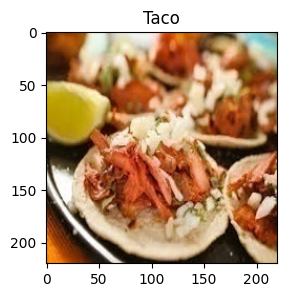

In [9]:
plt.figure(figsize=(5,3))
plt.title('Taco')
Baked_potato = plt.imread(training_data_path + '/Taco/Taco-Train (1009).jpeg')
plt.imshow(Baked_potato)
plt.show()

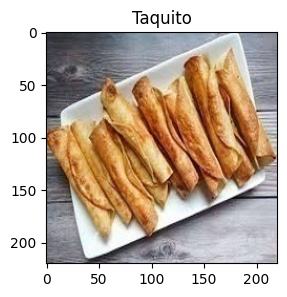

In [10]:
plt.figure(figsize=(5,3))
plt.title('Taquito')
Donut = plt.imread(training_data_path + '/Taquito/Taquito-Train (1002).jpeg')
plt.imshow(Donut)
plt.show()

**Image Data Augumentation**

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
training_set = ImageDataGenerator(rescale = 1 / 255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_set = ImageDataGenerator(rescale = 1 / 255,rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [13]:
labels =  ['Taco', 'Taquito', 'apple_pie']

In [14]:
train_input_data = training_set.flow_from_directory(training_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 30)

val_input_data = validation_set.flow_from_directory(validation_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 30)

Found 360 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [15]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.applications import VGG16

In [16]:
import warnings
warnings.filterwarnings('ignore')

# Model architecture

model = Sequential()

# 1st Filter (or) Hidden layer
model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', padding='valid', strides=1, input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Filter (or) Hidden layer
model.add(Conv2D(32 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Filter (or) Hidden layer
model.add(Conv2D(8 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Filter (or) Hidden layer
model.add(Conv2D(4 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [17]:
num_classes = 3
vgg_model = VGG16(input_shape=(256, 256, 3),
                  weights='imagenet',
                  include_top=False)

# Freeze base model layers so only top layers train
for layer in vgg_model.layers:
    layer.trainable = False

# Flatten and add fully connected layers
x = Flatten()(vgg_model.output)
h1_out = Dense(units=128, kernel_initializer='he_uniform', activation='relu')(x)
h2_out = Dense(units=16, kernel_initializer='he_uniform', activation='relu')(h1_out)

# Final output layer for 3 classes
output = Dense(units=num_classes, kernel_initializer='glorot_uniform', activation='softmax')(h2_out)

# Create the final model
model = Model(inputs=vgg_model.input, outputs=output)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
vgg_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [20]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_input_data,
    epochs=50,
    validation_data=val_input_data
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 354s 30s/step - accuracy: 0.3244 - loss: 1.1851 - val_accuracy: 0.6000 - val_loss: 0.9771
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 408s 35s/step - accuracy: 0.5938 - loss: 0.9358 - val_accuracy: 0.6167 - val_loss: 0.8492
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 365s 31s/step - accuracy: 0.6563 - loss: 0.7768 - val_accuracy: 0.7083 - val_loss: 0.7420
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 352s 30s/step - accuracy: 0.7791 - loss: 0.6134 - val_accuracy: 0.6750 - val_loss: 0.6961
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 410s 35s/step - accuracy: 0.8549 - loss: 0.4942 - val_accuracy: 0.7250 - val_loss: 0.5914
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 351s 30s/step - accuracy: 0.8442 - loss: 0.4690 - val_accuracy: 0.7750 - val_loss: 0.5715
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 350s 30s/step - accuracy: 0.8904 - loss: 0.3666 - val_accuracy: 0.6667 - val_loss: 0.6704
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 350s 30s/step - accuracy: 0.8410 - loss: 0.3918 - val_accuracy: 0.

**test_model**

In [21]:
import cv2

In [22]:
labels

['Taco', 'Taquito', 'apple_pie']

In [23]:
train_input_data.class_indices

{'Taco': 0, 'Taquito': 1, 'apple_pie': 2}

In [24]:
def fun(path):
    global model, train_input_data

    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # --- 1. Load and preprocess the image ---
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (256, 256))
    normalized = resized / 255.0
    input_image = np.expand_dims(normalized, axis=0)

    # --- 2. Predict using the model ---
    pred = model.predict(input_image, verbose=0)

    # --- 3. Get class mapping dynamically ---
    # Automatically adapts to whatever classes your train_input_data has
    mapping = train_input_data.class_indices
    inv_map = {v: k for k, v in mapping.items()}

    # --- 4. Get predicted class ---
    predicted_index = int(np.argmax(pred))
    predicted_label = inv_map.get(predicted_index, "Unknown Class")

    # --- 5. Debugging info ---
    print("\nGroup class mapping:", mapping)
    print("Model output probabilities:", np.round(pred, 3))
    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {predicted_label}\n")

    # --- 6. Display image with prediction ---
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()



Group class mapping: {'Taco': 0, 'Taquito': 1, 'apple_pie': 2}
Model output probabilities: [[0. 0. 1.]]
Predicted class index: 2
Predicted label: apple_pie



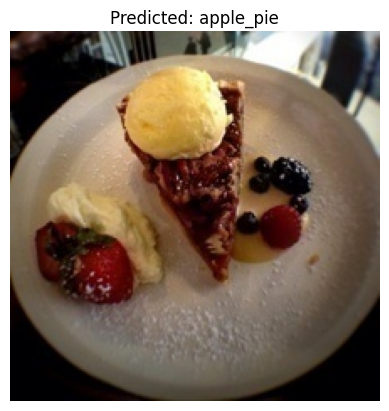

In [25]:
fun('/content/Split_data/Train/Group_3/apple_pie/1481550.jpg')


Group class mapping: {'Taco': 0, 'Taquito': 1, 'apple_pie': 2}
Model output probabilities: [[0.004 0.996 0.   ]]
Predicted class index: 1
Predicted label: Taquito



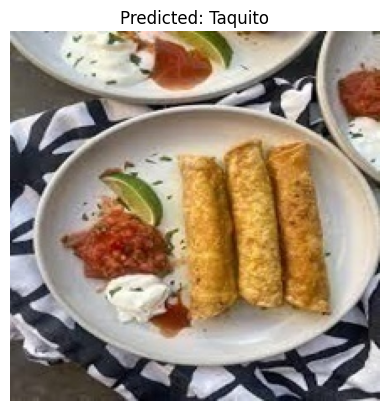

In [26]:
fun('/content/Split_data/Train/Group_3/Taquito/Taquito-Train (1205).jpeg')

In [27]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [28]:
test_data_path = '/content/Split_data/Test/Group_3'

In [29]:
labels = ['Taco', 'Taquito', 'apple_pie']

In [30]:
test_set = ImageDataGenerator(rescale=1./255)

test_input_data = test_set.flow_from_directory(
    test_data_path,
    classes=labels,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=10,
    shuffle=False
)


Found 120 images belonging to 3 classes.


In [31]:
test_input_data.reset()
predictions = model.predict(test_input_data, verbose=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step


In [32]:
from sklearn.metrics import classification_report, accuracy_score

In [33]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_input_data.classes

In [34]:
y_pred = y_pred.astype(int)
y_true = y_true.astype(int)

In [35]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_input_data.class_indices.keys())))


Classification Report:

              precision    recall  f1-score   support

        Taco       0.55      0.55      0.55        40
     Taquito       0.59      0.68      0.63        40
   apple_pie       0.91      0.78      0.84        40

    accuracy                           0.67       120
   macro avg       0.68      0.67      0.67       120
weighted avg       0.68      0.67      0.67       120



In [36]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.6667


In [37]:
from tensorflow.keras.models import load_model
model.save('/content/vgg16_group3.h5')
model = load_model('/content/vgg16_group3.h5')
